In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
sns.set_theme(context='notebook', font_scale=1.2)
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('survey_responses.csv',
                names = ['timestamp',
                        'intro',
                        'occupation', # background
                        'research_area', # background
                        'progress_impossible',
                        'progress_slower',
                        'reading', # background
                        'influence_on_work',
                        'paper_titles',
                        'use_of_concepts',
                        'importance',
                        'importance_multilingual_low_res',
                        'importance_multimodal_grounding',
                        'importance_engineering',
                        'importance_factuality_reasoning',
                        'importance_society_bias',
                        'additional_thoughts',
                        'whats_missing',
                        'why_not_important',
                        'name_for_acks'], header=0)

df['reading'] = df['reading'].replace({
    'Most of the works I read are about model analysis and interpretability': 5,
    'I read model analysis and interpretability work more than other NLP topics': 4,
    'I read model analysis and interpretability work in about the same volume as other NLP-related topics': 3,
    'I do read some model analysis and interpretability work, but much less than other topics': 2,
    "I don't usually read model analysis and interpretability work, but I do read NLP works about other topics": 1})

df['research_area'] = df['research_area'].str.split(':', expand=True)[0]

df['research_area'] = df['research_area'].replace({'𝗟𝗠 𝗮𝗱𝗮𝗽𝘁𝗮𝘁𝗶𝗼𝗻': 'LM adaptation',
 '𝗦𝗰𝗶𝗲𝗻𝗰𝗲 𝗼𝗳 𝗟𝗠𝘀': 'Science of LMs',
 '𝗦𝗼𝗰𝗶𝗲𝘁𝗮𝗹 𝗶𝗺𝗽𝗹𝗶𝗰𝗮𝘁𝗶𝗼𝗻𝘀': 'Societal implications',
 '𝗘𝘃𝗮𝗹𝘂𝗮𝘁𝗶𝗼𝗻 𝗼𝗳 𝗟𝗠𝘀': 'Evaluation',
 '𝗖𝗼𝗺𝗽𝘂𝘁𝗲 𝗲𝗳𝗳𝗶𝗰𝗶𝗲𝗻𝘁 𝗟𝗠𝘀': 'Compute-efficient LMs',
 '𝗖𝗼𝗺𝗽𝘂𝘁𝗮𝘁𝗶𝗼𝗻𝗮𝗹 𝗹𝗶𝗻𝗴𝘂𝗶𝘀𝘁𝗶𝗰𝘀': 'Computational linguistics',
 '𝗦𝗮𝗳𝗲𝘁𝘆': 'Safety',
 '𝗗𝗮𝘁𝗮 𝗳𝗼𝗿 𝗟𝗠𝘀': 'Data for LMs',
 '𝗟𝗠𝘀 𝗮𝗻𝗱 𝘁𝗵𝗲 𝘄𝗼𝗿𝗹𝗱': 'LMs and the world',
 '𝗡𝗲𝘂𝗿𝗼𝘀𝘆𝗺𝗯𝗼𝗹𝗶𝗰 𝗮𝗽𝗽𝗿𝗼𝗮𝗰𝗵𝗲𝘀': 'Neurosymbolic approaches',
 '𝗛𝘂𝗺𝗮𝗻 𝗺𝗶𝗻𝗱, 𝗯𝗿𝗮𝗶𝗻, 𝗽𝗵𝗶𝗹𝗼𝘀𝗼𝗽𝗵𝘆, 𝗹𝗮𝘄𝘀 𝗮𝗻𝗱 𝗟𝗠𝘀': 'Mind, brain and LMs',
 '𝗟𝗠𝘀 𝗼𝗻 𝗱𝗶𝘃𝗲𝗿𝘀𝗲 𝗺𝗼𝗱𝗮𝗹𝗶𝘁𝗶𝗲𝘀 𝗮𝗻𝗱 𝗻𝗼𝘃𝗲𝗹 𝗮𝗽𝗽𝗹𝗶𝗰𝗮𝘁𝗶𝗼𝗻𝘀': 'Multimodal and novel applications',
 '𝗟𝗲𝗮𝗿𝗻𝗶𝗻𝗴 𝗮𝗹𝗴𝗼𝗿𝗶𝘁𝗵𝗺𝘀': 'Learning algorithms',
 '𝗡𝗟𝗣 𝗮𝗽𝗽𝗹𝗶𝗰𝗮𝘁𝗶𝗼𝗻𝘀': 'NLP applications',
 '𝗡𝗲𝘂𝗿𝗼𝘀𝘆𝗺𝗯𝗼𝗹𝗶𝗰 𝗮𝗽𝗽𝗿𝗼𝗮𝗰𝗵𝗲𝘀, Interpretability': 'Neurosymbolic approaches',
 '𝗟𝗠𝘀 𝗳𝗼𝗿 𝗲𝘃𝗲𝗿𝘆𝗼𝗻𝗲': 'LMs for everyone',
 '𝗜𝗻𝗳𝗲𝗿𝗲𝗻𝗰𝗲 𝗮𝗹𝗴𝗼𝗿𝗶𝘁𝗵𝗺𝘀': 'Inference algorithms',
 'ML for Earth Observation ': 'Multimodal and novel applications'})

df['use_of_concepts'] = df['use_of_concepts'].replace({'Always': 5,
 'Often': 4,
 'Sometimes': 3,
 'Rarely': 2,
 'Never': 1})

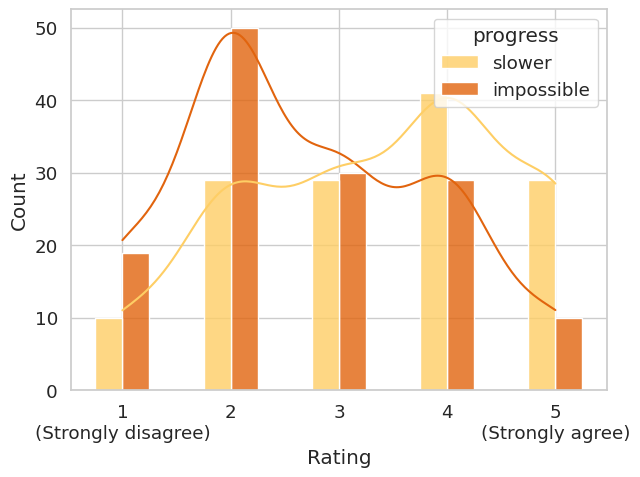

In [4]:
# plt.figure(figsize=(8,6))
progress_df = df.melt(value_vars=['progress_slower', 'progress_impossible'])
progress_df['progress'] = progress_df['variable'].str.split('progress_', expand=True)[1]
ax = sns.histplot(progress_df,
                  x='value',
                  hue='progress',
                  multiple='dodge',
                  kde=True,
                  discrete=True,
                  palette='YlOrBr',
                  alpha=0.8,
                  shrink=0.5)
sns.move_legend(
    ax, "upper right",
    bbox_to_anchor=(1, 1), #ncol=2, title=None, frameon=False,
)
plt.tight_layout()
plt.xlabel('Rating')
plt.xticks([1,2,3,4,5], ['1\n(Strongly disagree)', '2', '3', '4', '5\n(Strongly agree)'])
# plt.show()
plt.savefig('slower_impossible.pdf')

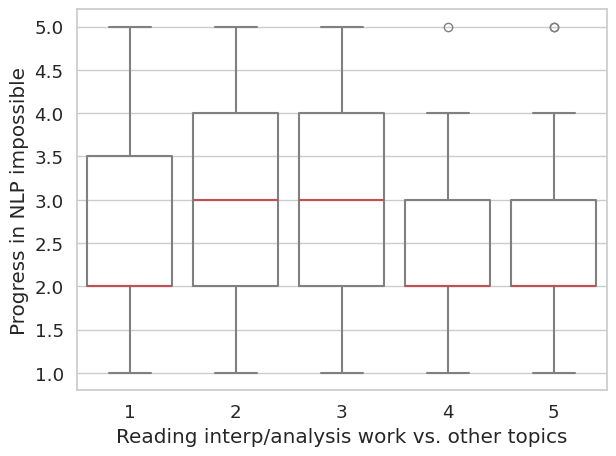

In [5]:
sns.boxplot(df, x='reading', y='progress_impossible',
            fill=False,
            medianprops={"color": "r"},color='grey')
# sns.stripplot(df, x='reading', y='progress_slower',
#               dodge=True,
#               jitter=True, alpha=0.8)
# plt.show()
plt.xlabel('Reading interp/analysis work vs. other topics')
plt.ylabel('Progress in NLP impossible')
# plt.xticks([1,2,3,4,5], ['1\n(Strongly disagree)', '2', '3', '4', '5\n(Strongly agree)']) # FIX
plt.tight_layout()
plt.savefig('progress_imposs_reading.pdf')

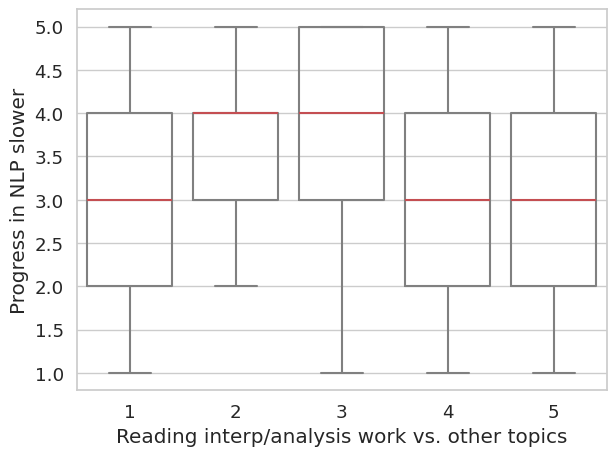

In [6]:
sns.boxplot(df, x='reading', y='progress_slower',
            fill=False,
            medianprops={"color": "r"},color='grey')
# sns.stripplot(df, x='reading', y='progress_slower',
#               dodge=True,
#               jitter=True, alpha=0.8)
# plt.show()
plt.xlabel('Reading interp/analysis work vs. other topics')
plt.ylabel('Progress in NLP slower')
# plt.xticks([1,2,3,4,5], ['1\n(Strongly disagree)', '2', '3', '4', '5\n(Strongly agree)']) # FIX
plt.tight_layout()
plt.savefig('progress_slower_reading.pdf')

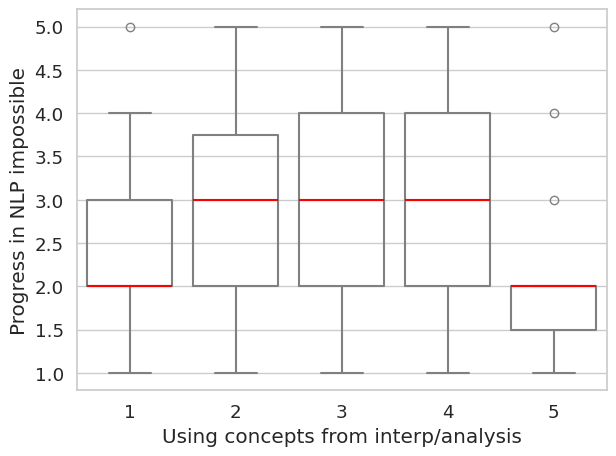

In [7]:
sns.boxplot(df, x='use_of_concepts', y='progress_impossible',
            fill=False,
            medianprops={"color": "red"},color='grey')
# sns.scatterplot(df, x='use_of_concepts', y='progress_impossible', alpha=0.8)
# plt.show()
plt.xlabel('Using concepts from interp/analysis')
plt.ylabel('Progress in NLP impossible')
# plt.xticks([1,2,3,4,5], ['1\n(Strongly disagree)', '2', '3', '4', '5\n(Strongly agree)']) # FIX
plt.tight_layout()
plt.savefig('progress_imposs_concepts.pdf')

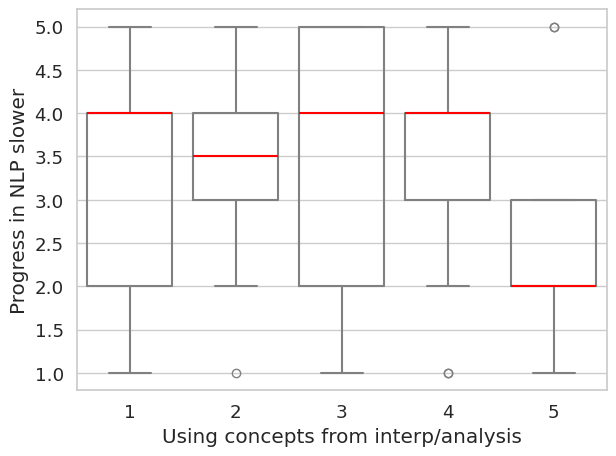

In [8]:
sns.boxplot(df, x='use_of_concepts', y='progress_slower',
            fill=False,
            medianprops={"color": "red"},color='grey')
# sns.stripplot(df, x='reading', y='progress_slower',
#               dodge=True,
#               jitter=True, alpha=0.8)
# plt.show()
plt.xlabel('Using concepts from interp/analysis')
plt.ylabel('Progress in NLP slower')
# plt.xticks([1,2,3,4,5], ['1\n(Strongly disagree)', '2', '3', '4', '5\n(Strongly agree)']) # FIX
plt.tight_layout()
plt.savefig('progress_slower_concepts.pdf')

In [9]:
df['work_on_interp'] = df['research_area'] == 'Science of LMs'

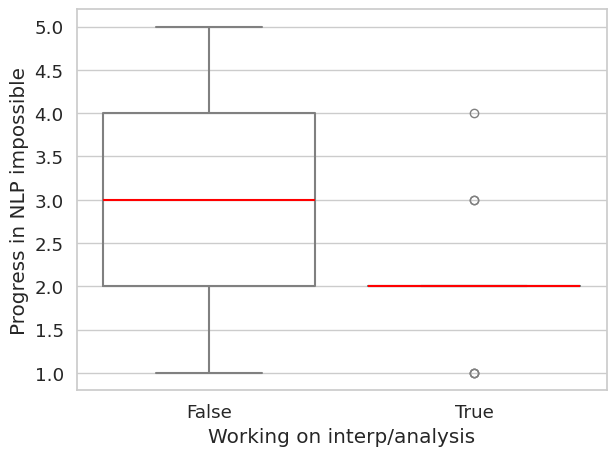

In [10]:
sns.boxplot(df, x='work_on_interp', y='progress_impossible',
            fill=False,
            medianprops={"color": "red"},color='grey')
# sns.stripplot(df, x='reading', y='progress_slower',
#               dodge=True,
#               jitter=True, alpha=0.8)
# plt.show()
plt.xlabel('Working on interp/analysis')
plt.ylabel('Progress in NLP impossible')
plt.tight_layout()
plt.savefig('progress_imposs_work.pdf')

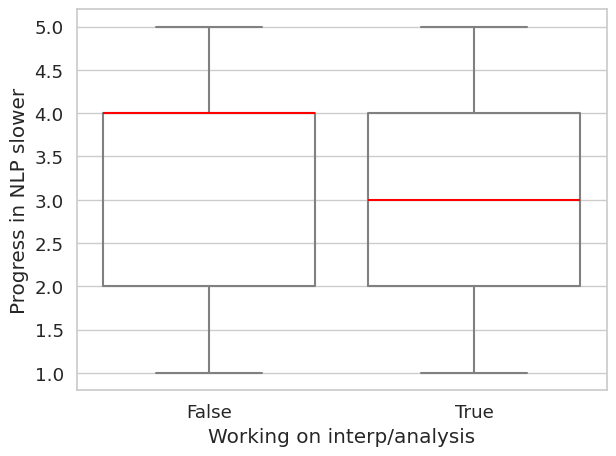

In [11]:
sns.boxplot(df, x='work_on_interp', y='progress_slower',
            fill=False,
            medianprops={"color": "red"},color='grey')
# sns.stripplot(df, x='reading', y='progress_slower',
#               dodge=True,
#               jitter=True, alpha=0.8)
# plt.show()
plt.xlabel('Working on interp/analysis')
plt.ylabel('Progress in NLP slower')
plt.tight_layout()
plt.savefig('progress_slower_work.pdf')